In [9]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [10]:
#Загрузим изображенеи
image = cv2.imread('image.jpg')

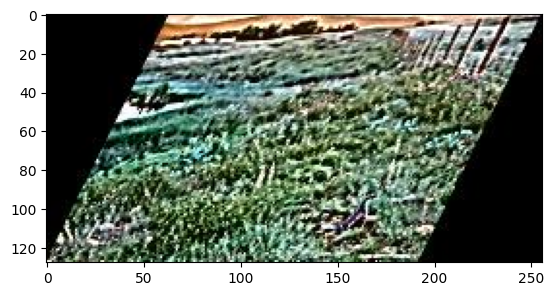

In [11]:
plt.imshow(image)

## Преобразование из brg в rgb

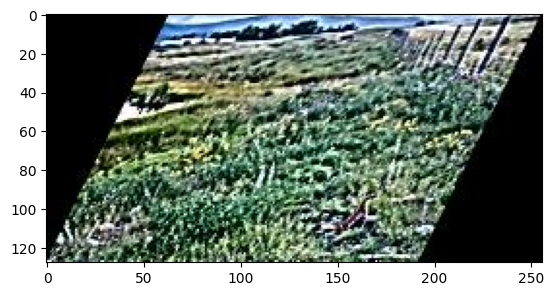

In [12]:
#Преобразуем изображение в rgb
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## Применение матрицы сдвига в направление оси X

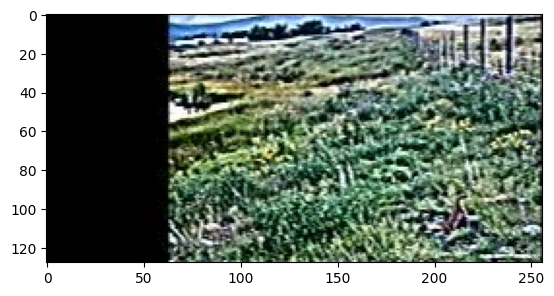

In [13]:
(h, w, d) = rgb_image.shape

M = np.float32([ [1, 0.5, 0],
               [0, 1, 0],
              [0, 0  , 1] ])
rotated = cv2.warpPerspective(rgb_image,M,(256,h))
plt.imshow(rotated)

## Кадрирование изображение (избавление от черного фона)

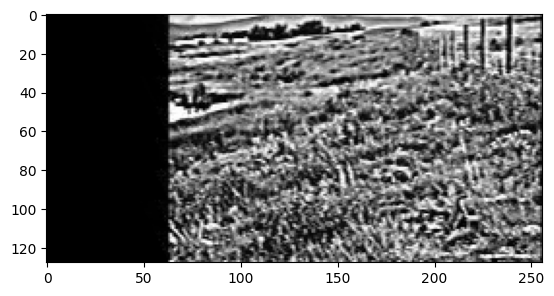

In [14]:
gray_image = cv2.cvtColor(rotated,cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray', vmin = 0, vmax = 255)

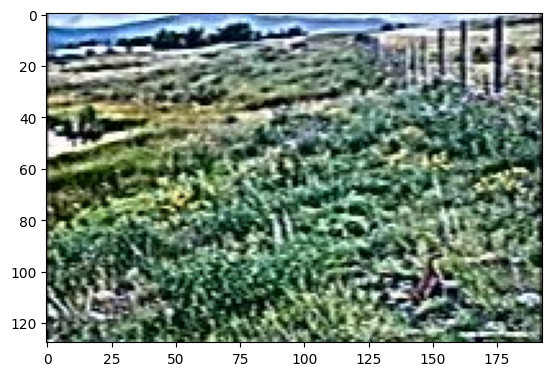

In [15]:
# Преобразование в двоичный формат
_,thresh = cv2.threshold(gray_image,30,255,cv2.THRESH_BINARY)

#Поиск конутра 
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

#Кадрирование
x,y,w,h= cv2.boundingRect(cnt)
cropep_image = rotated[y:y+h,x:x+w]

plt.imshow(cropep_image)